In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle 
!touch ~/.kaggle/kaggle.json

import json
import zipfile
import os
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d sogun3/uspollution

with zipfile.ZipFile('/content/uspollution.zip') as zip_ref:
  zip_ref.extractall('dataset')

 35% 9.00M/25.6M [00:00<00:00, 22.0MB/s]
100% 25.6M/25.6M [00:00<00:00, 47.5MB/s]


In [ ]:
df=pd.read_csv('/content/dataset/pollution_us_2000_2016.csv')

In [ ]:
df

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,24599,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-30,Parts per billion,1.083333,1.6,9,1,Parts per million,0.043917,0.048,18,44,Parts per billion,0.000000,0.0,2,NaN,Parts per million,0.091667,0.100,2,1.0
1746657,24600,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,1.3,5,1,Parts per million,0.045263,0.047,9,44,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.067714,0.127,0,NaN
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,1.3,5,1,Parts per million,0.045263,0.047,9,44,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.939130,1.3,5,1,Parts per million,0.045263,0.047,9,44,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN


In [ ]:
df=df.drop(['SO2 AQI','Address','State','County','City','Date Local','NO2 Units','SO2 Units','CO Units','Unnamed: 0','O3 Units'],axis=1)

In [ ]:
df

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,1.145833,4.200,21,NaN
1,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,0.878947,2.200,23,25.0
2,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,1.145833,4.200,21,NaN
3,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,0.878947,2.200,23,25.0
4,4,13,3002,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,0.850000,1.600,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,56,21,100,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,0.091667,0.100,2,1.0
1746657,56,21,100,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.067714,0.127,0,NaN
1746658,56,21,100,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.100000,0.100,0,1.0
1746659,56,21,100,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,0.067714,0.127,0,NaN


In [ ]:
df.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [ ]:
#Baseline
m=df['CO AQI'].mean()
m

5.996594674684944

In [ ]:
df['CO AQI']=df['CO AQI'].fillna(m)
df

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,1.145833,4.200,21,5.996595
1,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,3.000000,9.0,21,0.878947,2.200,23,25.000000
2,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,1.145833,4.200,21,5.996595
3,4,13,3002,19.041667,49.0,19,46,0.022500,0.040,10,34,2.975000,6.6,23,0.878947,2.200,23,25.000000
4,4,13,3002,22.958333,36.0,19,34,0.013375,0.032,10,27,1.958333,3.0,22,0.850000,1.600,23,5.996595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746656,56,21,100,1.083333,1.6,9,1,0.043917,0.048,18,44,0.000000,0.0,2,0.091667,0.100,2,1.000000
1746657,56,21,100,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.067714,0.127,0,5.996595
1746658,56,21,100,0.939130,1.3,5,1,0.045263,0.047,9,44,-0.022727,0.0,0,0.100000,0.100,0,1.000000
1746659,56,21,100,0.939130,1.3,5,1,0.045263,0.047,9,44,0.000000,0.0,5,0.067714,0.127,0,5.996595


In [ ]:
X = df.drop('CO AQI', axis=1)
y= df['CO AQI']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Train
rfr= RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr.score(X_train, y_train)

0.968727207194732

In [ ]:
#Test
rfr.score(X_test, y_test)

0.8394303592065901

##EDA

Text(0.5, 1.0, 'O3 AQI and CO AQI distribution')

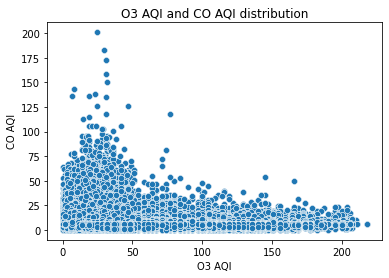

In [ ]:
sns.scatterplot(data =df, x=df['O3 AQI'] , y=df['CO AQI'])
plt.title('O3 AQI and CO AQI distribution')

Text(0.5, 1.0, 'pollution by coutry ')

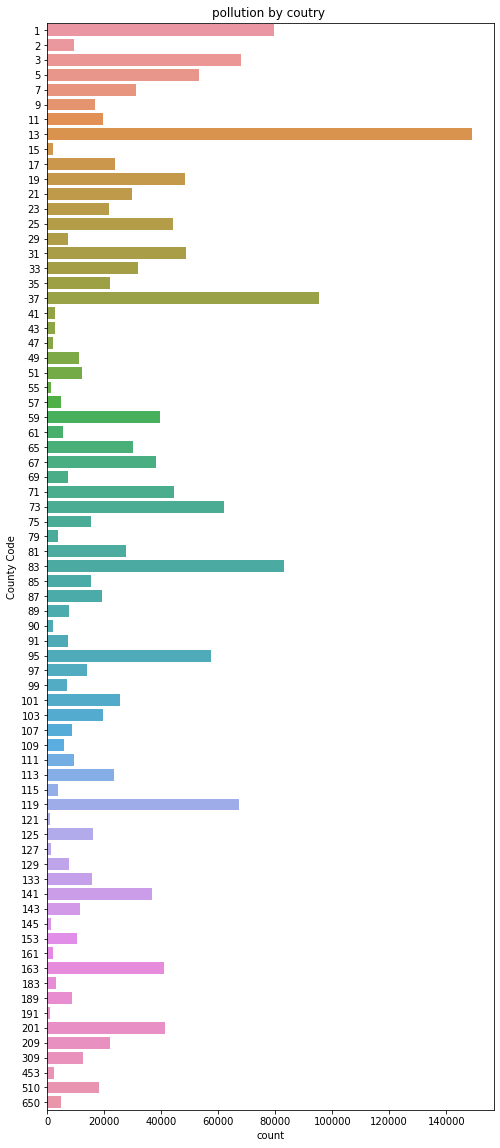

In [ ]:
plt.figure(figsize=(8,20))
sns.countplot(data =df, y=df['County Code']  )
plt.title('pollution by coutry ')